# <font style = "color:rgb(50,120,229)">Assignment Instructions</font>

This assignment carries **30 marks** and will be **manually graded**. You will have a total of **5 submissions** allowed.

In this assignment, you will be **creating a panorama using the stitcher class**. Unlike previous assignments, we will not be providing any function syntax to help you with. 

**This assignment has the following objectives** : 

1. Learn how to create a panorama using 8 images using the stitcher class in OpenCV.
1. Learn how to browse through the documentation and find relevant information to accomplish the task at hand. 
( NOTE that this is a very useful skill in general )
1. Read about how OpenCV implements Image Stitching. [**Please read about it here**](https://docs.opencv.org/4.1.0/d1/d46/group__stitching.html)

Please use [**this link for the relevant documentation page ( the stitcher class )**](https://docs.opencv.org/4.1.0/d2/d8d/classcv_1_1Stitcher.html).

# <font style = "color:rgb(50,120,229)">Creating Panoramas with multiple images</font>
Go through the documentation given in the links above and complete the code. The code is very simple and should not take much time. Thus, you should not search online and **ONLY** use the links provided to complete the assignment.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
import os

In [4]:
images = []

dirName = "scene"

imagefiles = ["../resources/images/scene/" + f for f in os.listdir("../resources/images/scene/") if f.endswith(".jpg")]
imagefiles.sort()

destination = "{}_result.png".format(dirName)
plt.figure(figsize=[20,15])
i=1
for filename in imagefiles:
    img = cv2.imread(filename)
    images.append(img)

<Figure size 1440x1080 with 0 Axes>

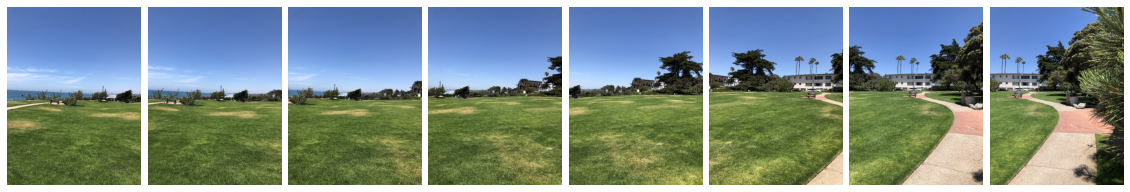

In [5]:
# Display all images
fig, axs = plt.subplots(1, 8, figsize=(20,20))
fig.subplots_adjust(wspace=0.05)
for i in range(len(images)):
    axs[i].imshow(images[i][:,:,::-1])
    axs[i].axis('off')

In [6]:
# Using OpenCV Stitcher Class
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

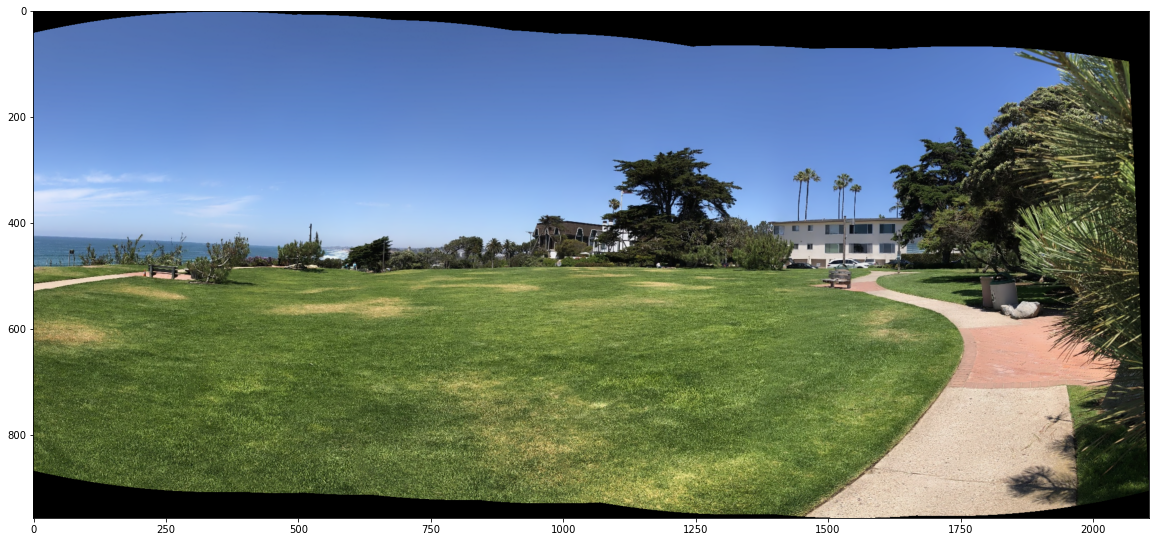

In [7]:
plt.figure(figsize=[20,10])
plt.imshow(stitched[:,:,::-1])

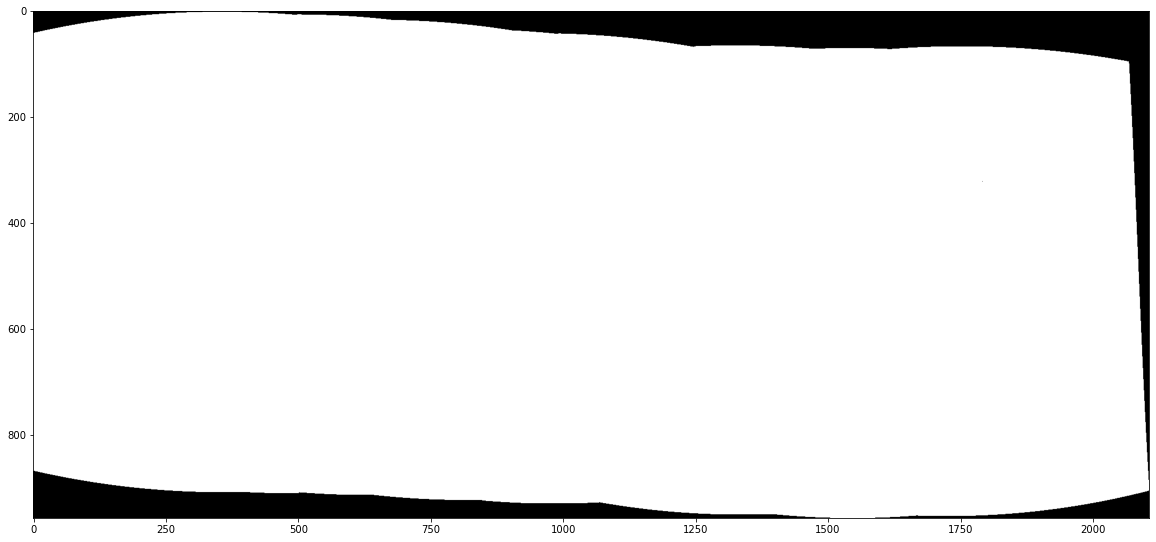

In [8]:
# Create a image region mask
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(gray, np.uint8)
mask[gray>0] = 255

# Display mask
plt.imshow(mask, cmap="gray")

cropped image shape: (328, 1477, 3)


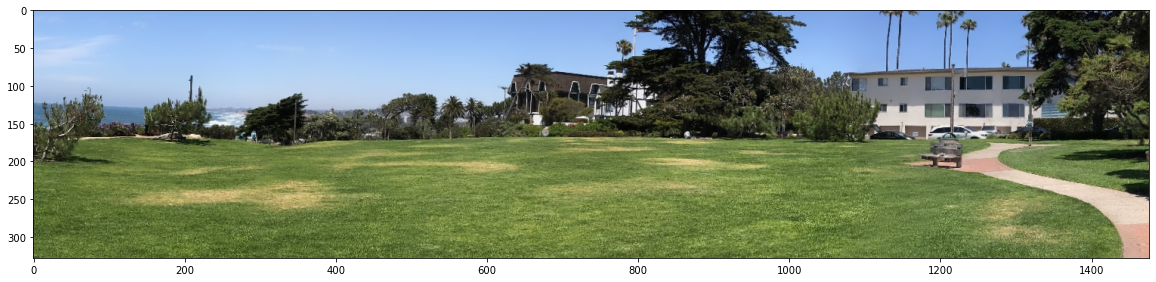

In [9]:
# Find an inner rectangle that fits inside the image region (not guarantee to be the maximum inner rectangle)
h, w = mask.shape
rec = [0, 0, w, h] # x0,y0,x1,y1
sign = [1, 1, -1, -1] 
step = 1 # increase this to make the search faster but less accurate
idx = 0

# Keep making the rectangle smaller untill it fits well into the image region
while np.any(mask[rec[1]:rec[3], rec[0]:rec[2]] == 0):
    rec[idx] += sign[idx]*step
    idx = (idx+1)%4
    
# Crop the stitched image
x0, y0, x1, y1 = rec
cropped = np.copy(stitched[y0:y1, x0:x1])

# Display cropped image
print(f"cropped image shape: {cropped.shape}")
plt.imshow(cropped[:,:,::-1])

In [10]:
cv2.imwrite("panorama_output.jpg", cropped)

True

## <font style="color:rgb(50,120,229)">Expected Output</font>

![](panorama.jpg)